<a href="https://colab.research.google.com/github/al-dayviid21/nyc_accident_analysis/blob/main/traffic_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NYC Traffic Accidents**

Motor vehicle collisions reported by the New York City Police Department from January-August 2020. Each record represents an individual collision, including the date, time and location of the accident (borough, zip code, street name, latitude/longitude), vehicles and victims involved, and contributing factors.

**Recommended Analysis**



> Compare the % of total accidents by month. Do you notice any seasonal patterns?



> Break down accident frequency by day of week and hour of day. Based on this data, when do accidents occur most frequently?

> On which particular street were the most accidents reported? What does that represent as a % of all reported accidents?

> What was the most common contributing factor for the accidents reported in this sample (based on Vehicle 1)? What about for fatal accidents specifically?

**Import Statements**

In [93]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas
import geoplot
import squarify 
from shapely.geometry import Point, Polygon



# pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 50)

**Read File**

In [97]:
df = pd.read_csv('NYC Accidents 2020.csv')
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


**Data Cleaning and Data Wrangling**

**Issues to be addressed**
> Deal with null and duplicate values (Drop row with null collission id, number of "participants" injured or killed).

> Change Crash Date and Time to datetime format

> Zip code to object

> Handle the column names

> Handle the vehicle names e.g. ambulence, amb

> Handle spelling issues such as illnes 

> Drop latitude and longitude values equal to zero

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [99]:
# check for null
df.isna().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          25741
ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
OFF STREET NAME                  55444
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
CONTRIBUTING FACTOR VEHICLE 3    68116
CONTRIBUTING FACTOR VEHICLE 4    73030
CONTRIBUTING FACTOR VEHICLE 5    74358
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2      

In [100]:
# check for duplicates
df.duplicated().sum()

0

In [101]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,49134.000000,68935.000000,68935.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,7.488100e+04
mean,10913.681585,40.689825,-73.843376,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055,4.305762e+06
std,515.069483,1.233368,2.234881,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073,2.171658e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.063247e+06
25%,10458.000000,40.667076,-73.958680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.287041e+06
50%,11210.000000,40.716885,-73.916850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.305812e+06
75%,11354.000000,40.789445,-73.862630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324545e+06
max,11697.000000,40.912884,0.000000,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000,4.343622e+06


In [102]:
df['BOROUGH'].value_counts()

BROOKLYN         16907
QUEENS           14017
BRONX             9417
MANHATTAN         7353
STATEN ISLAND     1446
Name: BOROUGH, dtype: int64

In [103]:
df['OFF STREET NAME'].value_counts()

772 EDGEWATER ROAD           29
501 GATEWAY DRIVE            15
450 FLATBUSH AVENUE          12
625 ATLANTIC AVENUE          11
110-00 ROCKAWAY BOULEVARD    11
                             ..
34 MILDRED AVENUE             1
3333 BAYCHESTER AVENUE        1
376 UNION AVENUE              1
1382 EAST 49 STREET           1
70-25 PARK DRIVE EAST         1
Name: OFF STREET NAME, Length: 17451, dtype: int64

In [104]:
df['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  34349
Station Wagon/Sport Utility Vehicle    27541
Taxi                                    2768
Pick-up Truck                           1882
Box Truck                               1417
                                       ...  
ELEC. UNIC                                 1
1C                                         1
DELIVERY T                                 1
MTA BUS                                    1
TANK                                       1
Name: VEHICLE TYPE CODE 1, Length: 272, dtype: int64

In [105]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                                              19471
Driver Inattention/Distraction                           19123
Following Too Closely                                     5202
Failure to Yield Right-of-Way                             4815
Passing or Lane Usage Improper                            2840
Backing Unsafely                                          2829
Passing Too Closely                                       2687
Other Vehicular                                           2233
Unsafe Speed                                              2015
Unsafe Lane Changing                                      1809
Traffic Control Disregarded                               1544
Turning Improperly                                        1399
Driver Inexperience                                       1290
Reaction to Uninvolved Vehicle                            1197
Alcohol Involvement                                        974
Pavement Slippery                                      

Replace space between column names with underscore

In [106]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


Merge crash date and time and convert to datetime format

In [107]:
df['CRASH_DATETIME'] = df['CRASH_DATE'] + " " + df['CRASH_TIME']
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATETIME'])
df['CRASH_DATETIME'].dtypes

dtype('<M8[ns]')

In [108]:
# df = df.drop(['CRASH_DATE', 'CRASH_TIME'], axis=1)
# df.columns

Drop row with null collission id, number of "participants" injured or killed

In [109]:
df = df.dropna(subset=['COLLISION_ID'])
len(df)

74881

Handle spelling issues such as illnes

In [110]:
# Check if Illness is in all the contributing factor columns
cf_cols = ['CONTRIBUTING_FACTOR_VEHICLE_1','CONTRIBUTING_FACTOR_VEHICLE_2','CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5']

for col in cf_cols:
  if (df[col].eq('Illnes')).any():
    df[col] = df[col].str.replace('Illnes', 'Illness')


Handle the vehicle names e.g. ambulence, amb

In [111]:
amb_list = list(df[df['VEHICLE_TYPE_CODE_1'].str.contains('amb', case=False) == True]['VEHICLE_TYPE_CODE_1'].unique())
for lst in amb_list:
  df['VEHICLE_TYPE_CODE_1'] = df['VEHICLE_TYPE_CODE_1'].str.replace(lst, 'Ambulance')


Check for distribution and outliers

<Figure size 720x576 with 0 Axes>

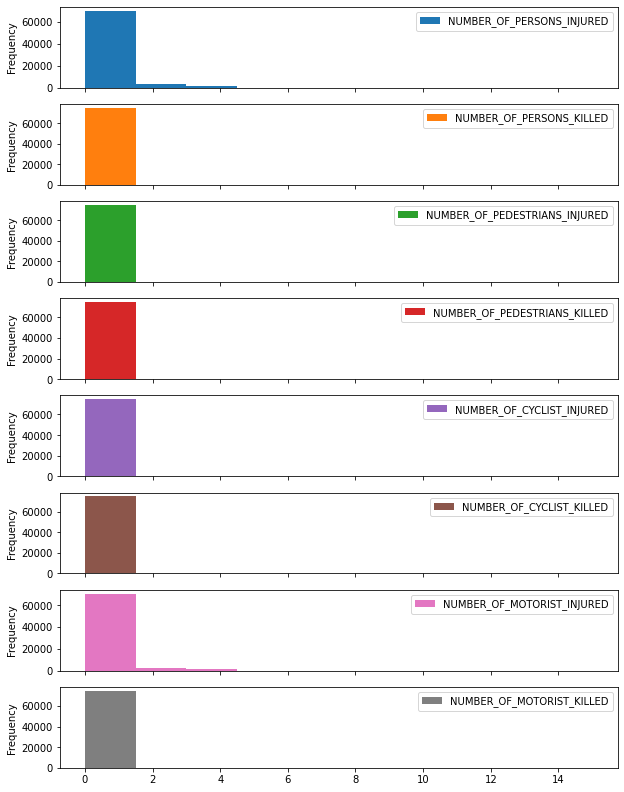

In [112]:
plt.figure(figsize=(10,8))
df[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED', "NUMBER_OF_PEDESTRIANS_INJURED", "NUMBER_OF_PEDESTRIANS_KILLED", "NUMBER_OF_CYCLIST_INJURED", "NUMBER_OF_CYCLIST_KILLED", "NUMBER_OF_MOTORIST_INJURED", "NUMBER_OF_MOTORIST_KILLED"]].plot(kind='hist',subplots=True, figsize=(10, 14));

**Feature Engineering**

In [113]:
df['NUMBER_OF_CASUALTIES'] = df['NUMBER_OF_PERSONS_KILLED'] + df['NUMBER_OF_PERSONS_INJURED']

**Exploratory Data Analysis**

Let's visualize where our dataset is located

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



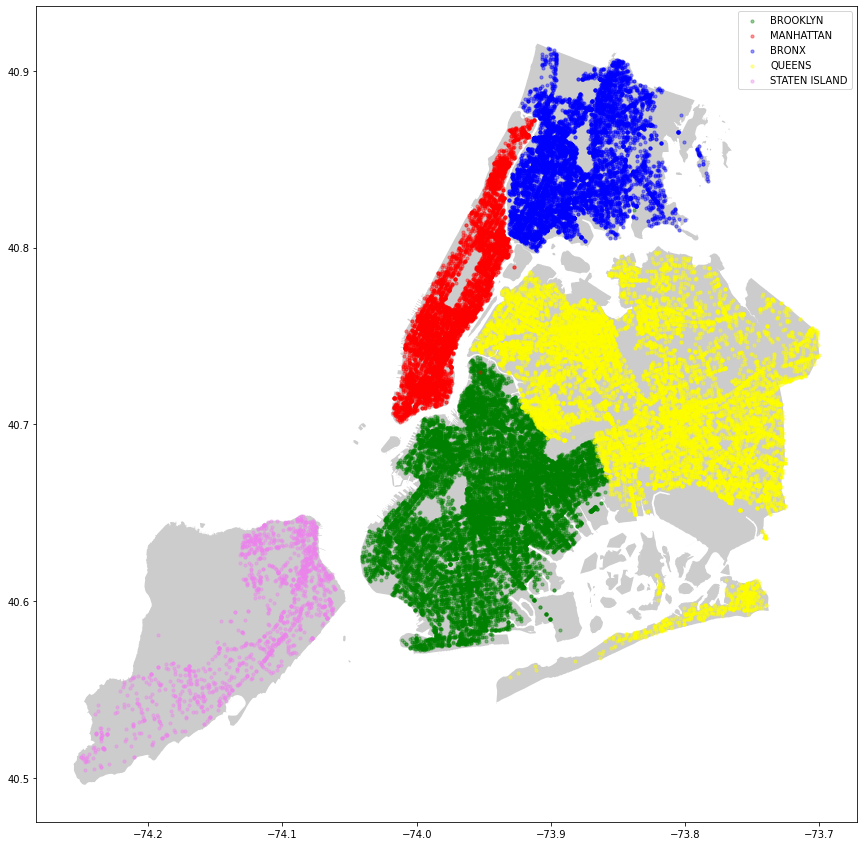

In [114]:
# prepare data
df_loc = df.dropna(subset=['LONGITUDE'])
df_loc = df.dropna(subset=['LATITUDE'])
df_loc = df_loc[df_loc['LONGITUDE'] != 0]

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geometry = [Point(xy) for xy in zip(df_loc["LONGITUDE"], df_loc["LATITUDE"])]
geo_df=geopandas.GeoDataFrame(df_loc,crs=crs,geometry=geometry)

# create a plot
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
borough_list = ["BROOKLYN", "MANHATTAN", "BRONX", "QUEENS", "STATEN ISLAND"]
color_list = ['green', 'red', 'blue', 'yellow', 'violet']
for i in range(len(borough_list)):
  geo_df[geo_df['BOROUGH']==borough_list[i]].plot(ax=ax,markersize=10, alpha=0.4,color=color_list[i], label=borough_list[i])
plt.legend()

# show plot
plt.show()

As can be seen in the map above, our dataset can be divided into 5 boroughs; Brooklyn, Manhattan, Bronx, Queens, and State Island. Let's see the composition of these boroughs in terms of the number of casualties.

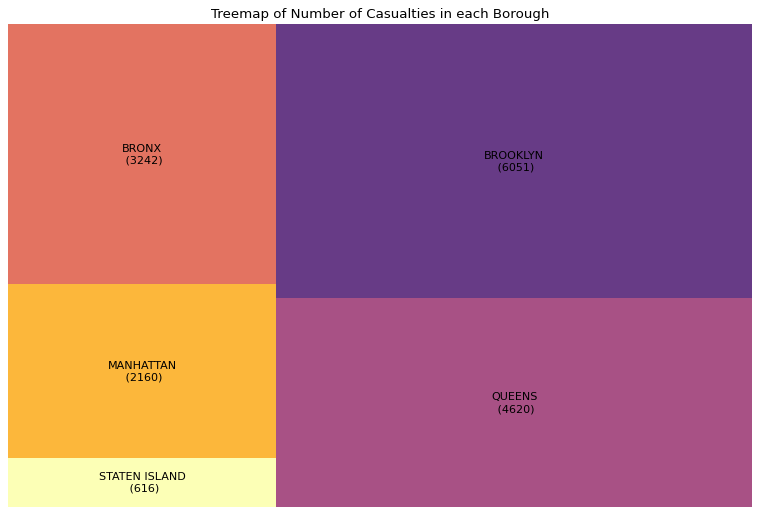

In [115]:
# prepare data
df_borough = pd.DataFrame(df.groupby('BOROUGH')['NUMBER_OF_CASUALTIES'].sum().sort_values()).reset_index()
labels = df_borough.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_borough['NUMBER_OF_CASUALTIES'].values.tolist()
colors = [plt.cm.inferno_r(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Number of Casualties in each Borough')
plt.axis('off')
plt.show()

Brooklyn is the Borough with the most number of casualties followed by Queens. Staten Island is the Borough with the least number. Is population and square area a factor? Brooklyn and Staten Island have the highest and lowest populations according to the US Census Bureau. 

In [116]:
# read in population density file
df_population = pd.read_csv('NYC Borough Population Density.csv')

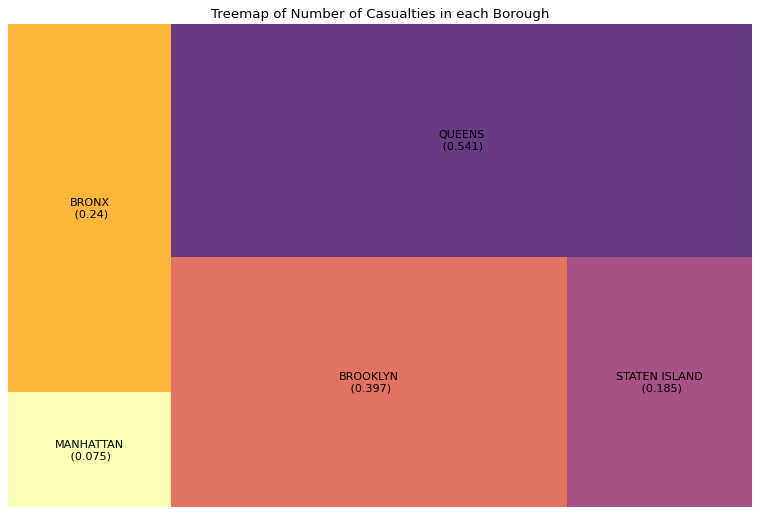

In [117]:
# prepare data
df_bor_pop_den = pd.merge(df_population, df_borough, on='BOROUGH')
df_bor_pop_den['CASUALTY_PER_POPULATION_DENSITY'] = round(df_bor_pop_den['NUMBER_OF_CASUALTIES'] / df_bor_pop_den['POPULATION_DENSITY'],3)
df_bor_pop_den

# df_borough = pd.DataFrame(df.groupby('BOROUGH')['NUMBER_OF_CASUALTIES'].sum().sort_values()).reset_index()
labels = df_bor_pop_den.apply(lambda x: str(x[0]) + "\n (" + str(x[3]) + ")", axis=1)
sizes = df_bor_pop_den['CASUALTY_PER_POPULATION_DENSITY'].values.tolist()
colors = [plt.cm.inferno_r(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Number of Casualties in each Borough')
plt.axis('off')
plt.show()

Therefore, after correction for population and square area, Queens is the Borough with the most accident casualties in the year 2020 while Manhattan is the least.

Let's see the streets where most accidents occur. 

In [118]:
df_street = pd.DataFrame(df.groupby(['BOROUGH', 'ON_STREET_NAME'])['NUMBER_OF_CASUALTIES'].count().sort_values(ascending=False)[:10]).reset_index().sort_values('NUMBER_OF_CASUALTIES')
fig = px.bar(y=df_street['ON_STREET_NAME'], x=df_street['NUMBER_OF_CASUALTIES'], color=df_street['BOROUGH'], orientation='h')
fig.show()

The Atlantic Avenue in Brooklyn clearly tops the charts. The 2 Avenue in Manhattan and Northern Boulevard in Queens come second and third. No street in Staten Island are in the top 10. 

Now, let's see the data based on season. First, we will view the seasonal trend then we will drill down according to month, day, and hours. This will help us visualize peak seasons.

Let's see the seasonal casualty trend.

In [119]:
df_month = df.groupby('CRASH_DATE')['NUMBER_OF_CASUALTIES'].sum()
fig = px.line(x=df_month.index, y=df_month.values, title='Trend of Casualties over the studied period')
fig.update_layout(xaxis_title="Date", yaxis_title="Number of Casualties")
fig.show()

The chart bove shows the seasonal casualty trend. Between the January and earliest parts of March, the number of casualties ranged generally between 100 and 200 after which it saw nose-dive, reaching its lowest values in April. The months of May and June saw a gradual increase in casualty cases and once it reached the January - March levels, it steadied in the 100 - 200 range. 

Let's confirm our top and bottom months in terms of casualties.

In [120]:
df['MONTH'] = df['CRASH_DATETIME'].dt.month_name()
df_month_bar = df.groupby('MONTH')['NUMBER_OF_CASUALTIES'].sum().sort_values()
fig = px.bar(x=df_month_bar.index, y=df_month_bar.values, title='Number of Casualties per Month')
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Casualties")
fig.show()

As expected, April produced the lowest casualty numbers. The month with highest number of casualties is July, followed closely by August, January, and February respectively.

Now, let's see which day of the week gives us the highest casualty numbers.

In [121]:
df['DAY_OF_WEEK'] = df['CRASH_DATETIME'].dt.day_name()
df_dow = df.groupby('DAY_OF_WEEK')['NUMBER_OF_CASUALTIES'].sum().sort_values()
fig = px.bar(x=df_dow.index, y=df_dow.values, title='Number of Casualties per Day of Week')
fig.update_layout(xaxis_title="Day of Week", yaxis_title="Number of Casualties")
fig.show()

Saturday and Friday gives us the highest numbers. 

Finally, let's see the the peak hour.

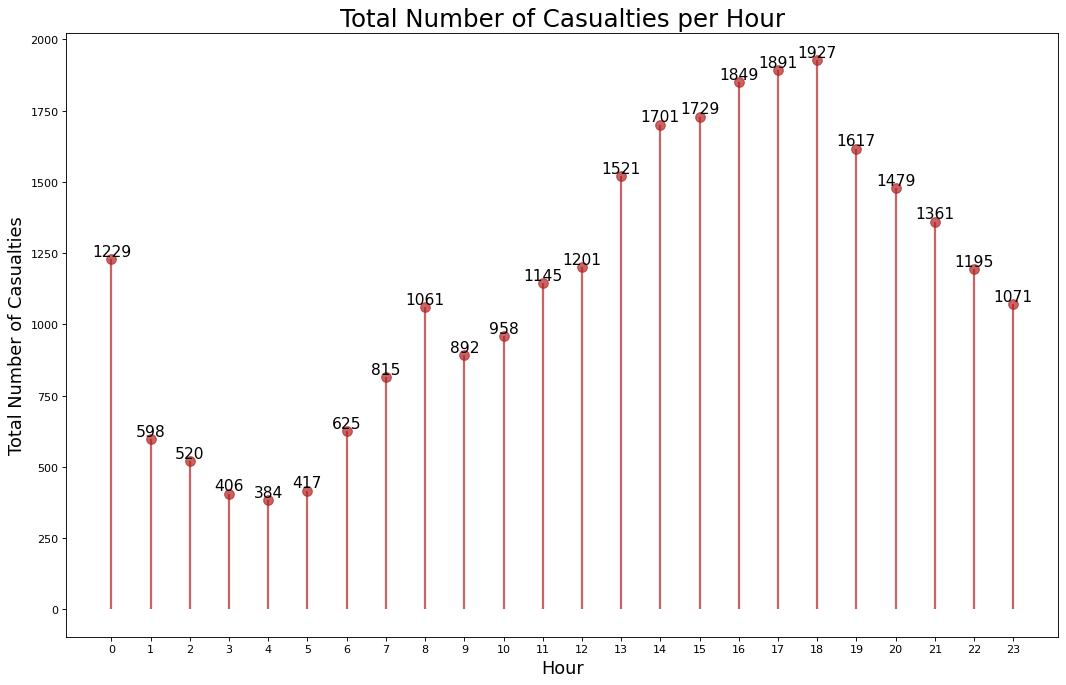

In [122]:
# prepare the data
df['HOUR'] = df['CRASH_DATETIME'].dt.hour
df_hour = df.groupby('HOUR')['NUMBER_OF_CASUALTIES'].sum()
df_hour = pd.DataFrame(df_hour).reset_index()

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_hour.index, ymin=0, ymax=df_hour['NUMBER_OF_CASUALTIES'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_hour.index, y=df_hour['NUMBER_OF_CASUALTIES'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Total Number of Casualties per Hour', fontdict={'size':22})
ax.set_ylabel('Total Number of Casualties', fontdict={'size':16})
ax.set_xlabel('Hour', fontdict={'size':16})
ax.set_xticks(df_hour.index)


# Annotate
for row in df_hour.itertuples():
    ax.text(row.Index, row.NUMBER_OF_CASUALTIES+.5, s=round(row.NUMBER_OF_CASUALTIES, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

As can be seen from the chart, the peak hour is 18:00hrs. 

For information purposes, what day was the bloodiest in 2020? 

In [123]:
# bloodiest day
blood_day = df.groupby('CRASH_DATE')['NUMBER_OF_PERSONS_KILLED'].sum().sort_values(ascending=False)[:1]
blood_day.index[0]
print(f'The bloodiest day was {blood_day.index[0]} with {blood_day[0]} deaths')

The bloodiest day was 2020-01-25 with 5 deaths


As we have investigated the location and season trends of the dataset, let's carry out our final analysis. We will investigate the type of vehicles that are frequently involved in accidents as well as the major contributing factors.

First, let's see the top ten vehicles involved in accidents

In [124]:
# vehicle type involved in the most accidents
df_veh = df['VEHICLE_TYPE_CODE_1'].value_counts()[:10]
fig = px.bar(y=df_veh.index, x=df_veh.values, orientation='h', title='Top Ten Vehicles with the Highest Number of Accidents')
fig.update_layout(yaxis_title="Vehicle Type", xaxis_title="Number of Accidents")
fig.show()

As can be seen the top two, by far, are Sedan and Station Wagon/Sport Utility Vehicle. Let's the number 1 causes for these types of vehicles, but first we should see the number 1 cause of traffic accidents regardless of vehicle type.

In [131]:
# Contributing factor 1 - waffle
df_cf = df['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()[1:11]
fig = px.bar(y=df_cf.index, x=df_cf.values, orientation='h', title='Top Ten Contributing Factors to Traffic Accidents')
fig.update_layout(yaxis_title="Contirbuting Factor", xaxis_title="Number of Cases")
fig.show()

The number one cause of traffic accident in NYC is Driver Inattention/Distraction. Now let's see the contributing factor to accidents in cases where Sedan, Station Wagon are the vehicle type.

In [132]:
# for cases where sedan as involved, what was the top 10 contributing factor
df_sedan = df[df['VEHICLE_TYPE_CODE_1']=='Sedan']
df_sedan_cf = df_sedan['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()[1:11]
fig = px.bar(y=df_sedan_cf.index, x=df_sedan_cf.values, orientation='h', title='Top Ten Contributing Factors to Traffic Accidents for Sedan Vehicles Only')
fig.update_layout(yaxis_title="Contirbuting Factor", xaxis_title="Number of Cases")
fig.show()

In [133]:
# for cases where station wagon/sport utility vehicle was involved, what was the top 10 contributing factor
df_sw = df[df['VEHICLE_TYPE_CODE_1']=='Station Wagon/Sport Utility Vehicle']
df_sw_cf = df_sw['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()[0:11]
fig = px.bar(y=df_sw_cf.index, x=df_sw_cf.values, orientation='h', title='Top Ten Contributing Factors to Traffic Accidents for Station Wagon/Sport Utility Vehicle Vehicles Only')
fig.update_layout(yaxis_title="Contirbuting Factor", xaxis_title="Number of Cases")
fig.show()

In both cases, the number one cause is the same as the general cause, Driver Inattention/Distraction.

However, a question arises: will this still be the number cause of traffic accidents in cases where there was atleast one death.

In [134]:
df_killed = df[df['NUMBER_OF_PERSONS_KILLED'] > 0]
df_killed_cf = df_killed['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()[:11]
fig = px.bar(y=df_killed_cf.index, x=df_killed_cf.values, orientation='h', title='Top Ten Contributing Factors to Traffic Accident Fatalities')
fig.update_layout(yaxis_title="Contirbuting Factor", xaxis_title="Number of Cases")
fig.show()

In this case, the number one cause is unsafe speed.

**Explanatory Data Analysis**

For the year 2020, there has been numerous traffic accidents and casualties. During the exploratory data analysis, we stumbled upon two major insights. Firstly, we want to know which borough has the most traffic accidents considering its number of casualties and population density. Secondly, we want to know the number one cause of traffic accidents that resulted in fatalities.

**New York City Boroughs and their Casualty to Population Density Ratio**

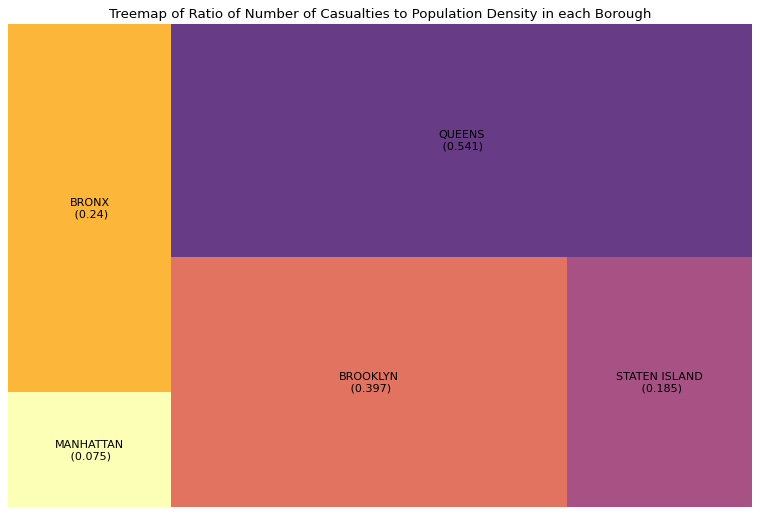

In [129]:
# prepare data
df_bor_pop_den = pd.merge(df_population, df_borough, on='BOROUGH')
df_bor_pop_den['CASUALTY_PER_POPULATION_DENSITY'] = round(df_bor_pop_den['NUMBER_OF_CASUALTIES'] / df_bor_pop_den['POPULATION_DENSITY'],3)
df_bor_pop_den

# df_borough = pd.DataFrame(df.groupby('BOROUGH')['NUMBER_OF_CASUALTIES'].sum().sort_values()).reset_index()
labels = df_bor_pop_den.apply(lambda x: str(x[0]) + "\n (" + str(x[3]) + ")", axis=1)
sizes = df_bor_pop_den['CASUALTY_PER_POPULATION_DENSITY'].values.tolist()
colors = [plt.cm.inferno_r(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Ratio of Number of Casualties to Population Density in each Borough')
plt.axis('off')
plt.show()

The chart above shows the 5 Boroughs in New York City and the casualty to population density ratio which quantifies a Borough's casualty rate. As can be seen in the chart, Queens is the Borough with the most traffic accident casualty so far in 2020 with a ratio of 0.541 followed by Brooklyn. Manhattan is by far the least with a ratio of 0.075. 

**Number One Cause of Traffic Accident Fatalities**

In [130]:
# prepare data
df_killed = df[df['NUMBER_OF_PERSONS_KILLED'] > 0]
df_killed_cf = df_killed['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()[:11]

# set color
default_color = "grey"
colors = {"Unsafe Speed": "orange"}
color_discrete_map = {
    c: colors.get(c, default_color) 
    for c in df_killed_cf.index}

# plot chart
fig = px.bar(y=df_killed_cf.index, x=df_killed_cf.values, orientation='h', title='The Apex Contributing Factor to Traffic Accident Fatalities', color=df_killed_cf.index,color_discrete_map=color_discrete_map)
fig.update_layout(yaxis_title="Contirbuting Factor", xaxis_title="Number of Cases")
fig.update_traces(showlegend=False)
fig.show()

As can be clearly seen in the bar chart above, the foremost cause of deaths from traffic accidents is unsafe speed. This correlates with numerous works carried out by many other researchers.

**Conclusion**

The NYC Accident Data was analysed to create good insights and beautiful visualizations. Firstly, the data was cleaning was conducted where columns were renamed, wrong data types were corrected amongst others. Feature engineering was then carried out to obtain the number of casualties. After which exploratory data analysis to have a good understanding of the dataset was done. Here, various plots such as treemaps, bar charts, histograms, line plots and maps were used to explore the dataset and find seasonal trends, location information as well as details as it pertains to the accident records (vehicle type, contributing factors, number of casualties).
The information obtained from this analysis became the framework for the explanatory analysis. Herein, two major insights with the aid of visualizations were discussed: New York City Boroughs and their Casualty to Population Density Ratio and Number One Cause of Traffic Accident Fatalities.
Conclusively, **Bronx** is the Borough with the highest number of casualties, **Manhattan** is the least. As for the contributing factor, all I can say is **speed kills**.